In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
try:
    data = pd.read_csv("real_estate_nrb_cleaned.csv", sep=';', on_bad_lines='warn')
    # If you want to see which lines are causing errors, you can switch to 'warn'.
    # data = pd.read_csv("real_estate_nrb_cleaned.csv", sep=';', on_bad_lines='warn')
    print(data.head())
except Exception as e:
    print("An error occurred:", e)

                                             Title   Category  \
0  4 Bed Townhouse With En Suite At Five Star Road  Townhouse   
1   5 Bed Townhouse With En Suite In Spring Valley  Townhouse   
2   4 Bed Townhouse With En Suite At Owashika Road  Townhouse   
3      5 Bed Townhouse With En Suite In Nyali Area      Villa   
4       3 Bed House With En Suite At Kangundo Road   Bungalow   

                                    Location  Beds  Baths     Price  
0                    Five Star Road, South C     4    4.0  20000000  
1                   Spring Valley, Westlands     5    6.0  90000000  
2                   Owashika Road, Lavington     4    4.0  58500000  
3                          Nyali Area, Nyali     5    5.0  45000000  
4  Kangundo Road, Kamulu, Kamulu Joska Malaa     3    3.0   7300000  


In [25]:
data

,Title,Category,Location,Beds,Baths,Price
0,4 Bed Townhouse With En Suite At Five Star Road,Townhouse,"Five Star Road, South C",4,4.0,20000000
1,5 Bed Townhouse With En Suite In Spring Valley,Townhouse,"Spring Valley, Westlands",5,6.0,90000000
2,4 Bed Townhouse With En Suite At Owashika Road,Townhouse,"Owashika Road, Lavington",4,4.0,58500000
3,5 Bed Townhouse With En Suite In Nyali Area,Villa,"Nyali Area, Nyali",5,5.0,45000000
4,3 Bed House With En Suite At Kangundo Road,Bungalow,"Kangundo Road, Kamulu, Kamulu Joska Malaa",3,3.0,7300000
...,...,...,...,...,...,...
1355,4 Bed Townhouse With En Suite At Lavington,Townhouse,"Lavington, Lavington",4,4.0,50000000
1356,3 Bed House With En Suite At Palm Road,Other,"Palm Road, Malindi",3,3.0,14000000
1357,5 Bed Townhouse With En Suite In Lavington,Villa,Lavington,5,5.0,65000000
1358,5 Bed House With En Suite At Kitisuri,Other,"Kitisuri, Kitisuru, Westlands",5,NaN,376250000


# Explore the data to check for null values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1360 non-null   object 
 1   Category  1360 non-null   object 
 2   Location  1360 non-null   object 
 3   Beds      1360 non-null   int64  
 4   Baths     1200 non-null   float64
 5   Price     1360 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 63.9+ KB


Drop null values

In [27]:
data.dropna(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1357
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1200 non-null   object 
 1   Category  1200 non-null   object 
 2   Location  1200 non-null   object 
 3   Beds      1200 non-null   int64  
 4   Baths     1200 non-null   float64
 5   Price     1200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 65.6+ KB


# Split the data into training and testing datasets

In [29]:
from sklearn.model_selection import train_test_split

x = data.drop(['Price'], axis=1)
y = data['Price']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
train_data = x_train.join(y_train)

In [32]:
train_data

,Title,Category,Location,Beds,Baths,Price
286,5 Bed Townhouse With En Suite In Lavington,Villa,Lavington,5,5.0,65000000
719,4 Bed Villa With En Suite In Karen,Villa,Karen,4,5.0,69000000
924,7 Bed House With En Suite In Ridgeways,Other,Ridgeways,7,7.0,130000000
889,4 Bed Villa With En Suite In Karen,Villa,Karen,4,5.0,69000000
413,4 Bed Villa With En Suite In Karen,Villa,Karen,4,5.0,69000000
...,...,...,...,...,...,...
53,4 Bed Townhouse With En Suite At Owashika Road,Townhouse,"Owashika Road, Lavington",4,4.0,58500000
1265,5 Bed House With En Suite In Runda,Other,"Runda, Westlands",5,5.0,150000000
204,4 Bed Townhouse With En Suite At Five Star Road,Townhouse,"Five Star Road, South C",4,4.0,20000000
1347,3 Bed House With En Suite At Kangundo Road,Bungalow,"Kangundo Road, Kamulu, Kamulu Joska Malaa",3,3.0,7300000


Plot histogram to explore the distribution of the different numerical features of the houses

array([[<Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Baths'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

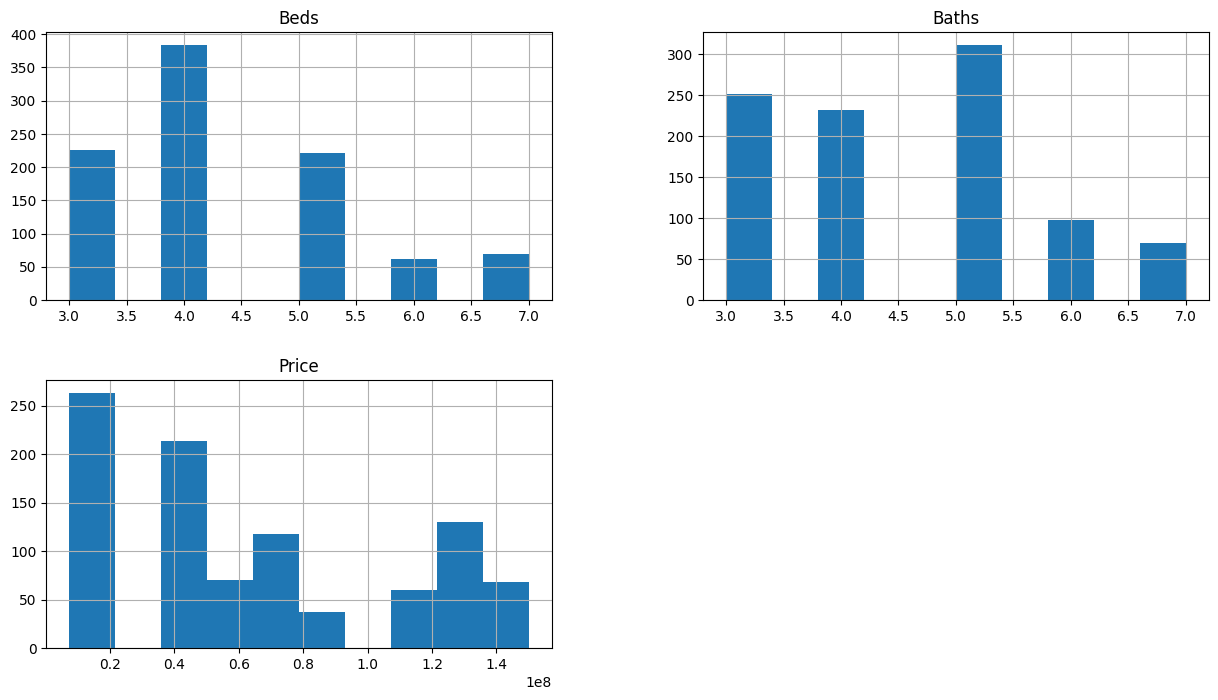

In [33]:
train_data.hist(figsize=(15, 8))

Plot a heatmap to visualize the correlation matrix with the target variable - price

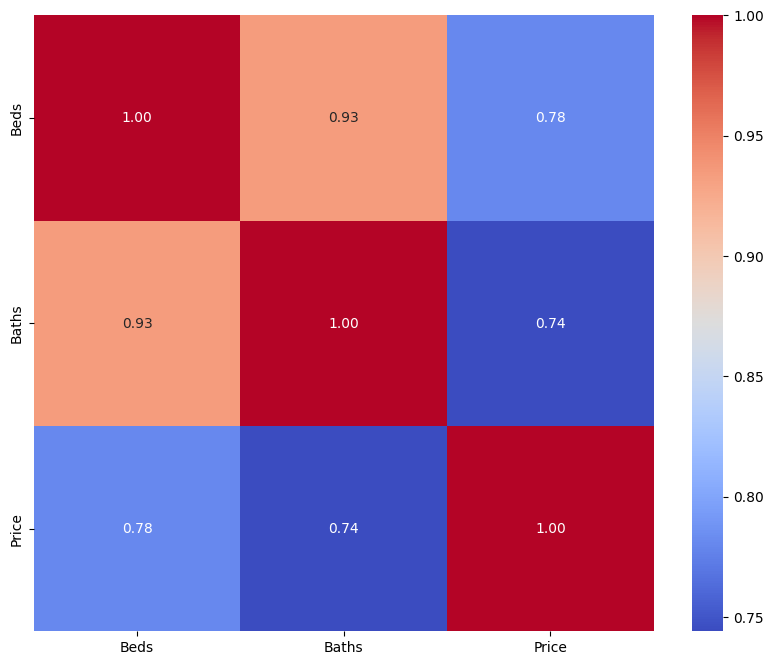

In [34]:
# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Feature preprocessing; assign binary values to non-numeric data

In [35]:
train_data.Category.value_counts()

Category
Townhouse    355
Villa        304
Other        205
Bungalow      96
Name: count, dtype: int64

In [40]:
pd.get_dummies(train_data.Category).astype(int)

,Bungalow,Other,Townhouse,Villa
286,0,0,0,1
719,0,0,0,1
924,0,1,0,0
889,0,0,0,1
413,0,0,0,1
...,...,...,...,...
53,0,0,1,0
1265,0,1,0,0
204,0,0,1,0
1347,1,0,0,0


In [43]:
train_data = train_data.join(pd.get_dummies(train_data.Category).astype(int)).drop(['Category'], axis=1)

In [44]:
train_data

,Title,Location,Beds,Baths,Price,Bungalow,Other,Townhouse,Villa
286,5 Bed Townhouse With En Suite In Lavington,Lavington,5,5.0,65000000,0,0,0,1
719,4 Bed Villa With En Suite In Karen,Karen,4,5.0,69000000,0,0,0,1
924,7 Bed House With En Suite In Ridgeways,Ridgeways,7,7.0,130000000,0,1,0,0
889,4 Bed Villa With En Suite In Karen,Karen,4,5.0,69000000,0,0,0,1
413,4 Bed Villa With En Suite In Karen,Karen,4,5.0,69000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...
53,4 Bed Townhouse With En Suite At Owashika Road,"Owashika Road, Lavington",4,4.0,58500000,0,0,1,0
1265,5 Bed House With En Suite In Runda,"Runda, Westlands",5,5.0,150000000,0,1,0,0
204,4 Bed Townhouse With En Suite At Five Star Road,"Five Star Road, South C",4,4.0,20000000,0,0,1,0
1347,3 Bed House With En Suite At Kangundo Road,"Kangundo Road, Kamulu, Kamulu Joska Malaa",3,3.0,7300000,1,0,0,0


* Plot a correlation heatmap to show the correlation matrix with the categories

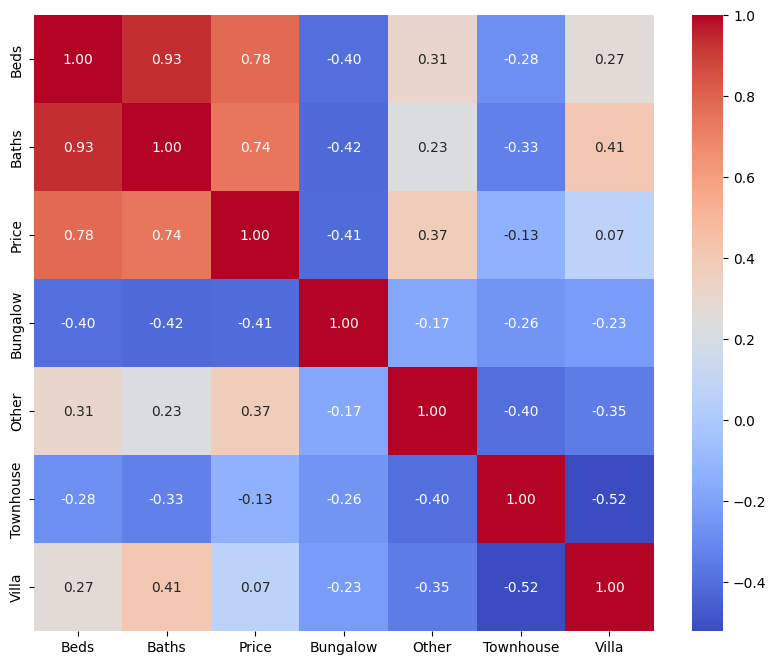

In [45]:
# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()